Found 5 CAPTCHA images


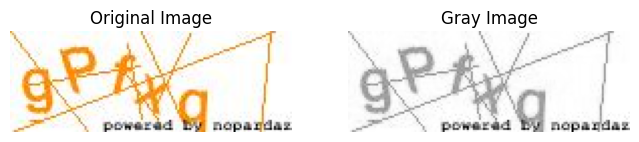

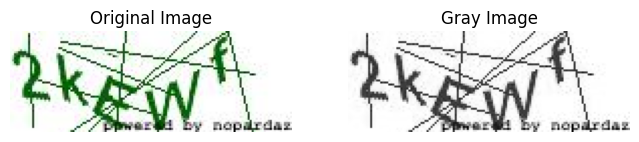

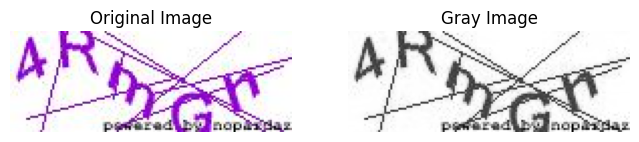

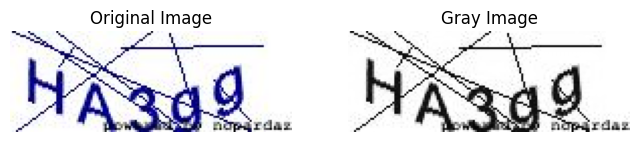

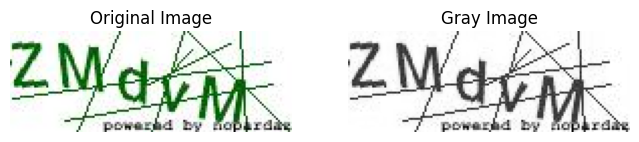

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_folder = "sample_captchas/"

captcha_files = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

print(f"Found {len(captcha_files)} CAPTCHA images")

gray_images = {}

for image_path in captcha_files:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        continue
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_images[image_path] = gray
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(gray, cmap="gray")
    plt.title("Gray Image")
    plt.axis("off")

    plt.show()


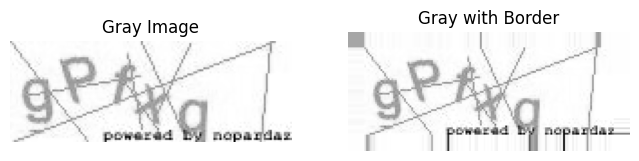

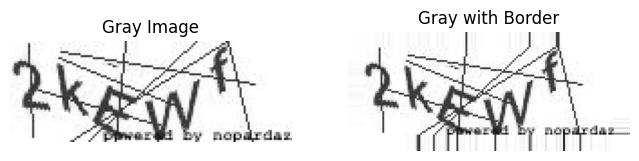

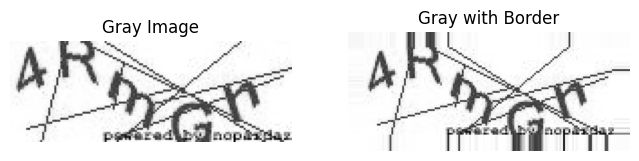

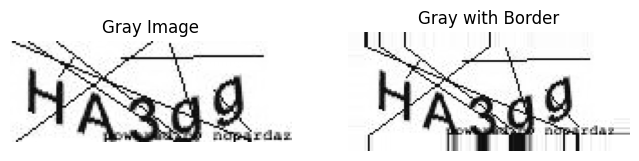

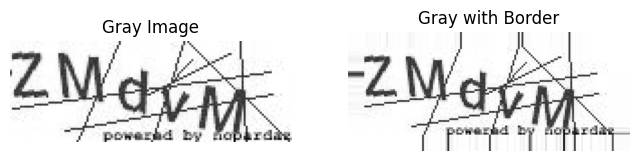

In [ ]:
gray_with_borders = {}

for image_path, gray_image in gray_images.items():
    gray_with_border = cv2.copyMakeBorder(gray_image, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
    gray_with_borders[image_path] = gray_with_border

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap="gray")
    plt.title("Gray Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(gray_with_border, cmap="gray")
    plt.title("Gray with Border")
    plt.axis("off")

    plt.show()


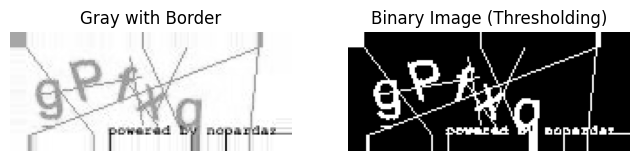

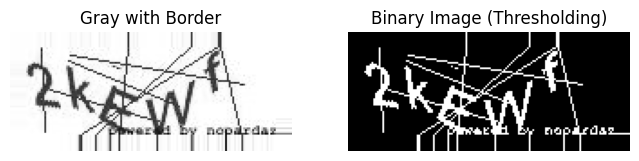

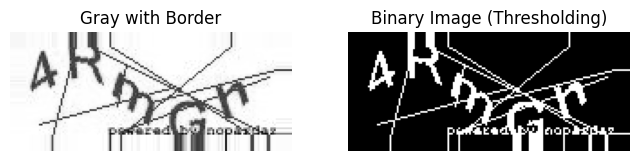

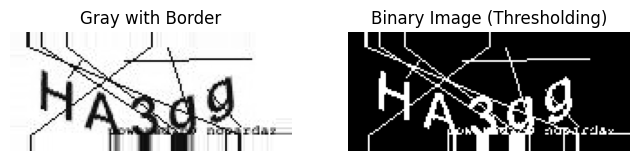

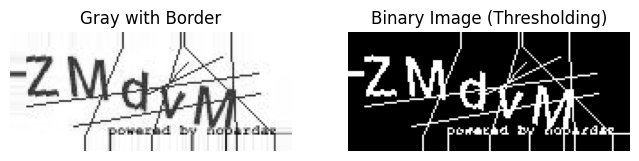

In [ ]:
binary_images = {}

for image_path, gray_with_border in gray_with_borders.items():
    binary_image = cv2.threshold(
        gray_with_border, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
    binary_images[image_path] = binary_image

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_with_border, cmap="gray")
    plt.title("Gray with Border")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(binary_image, cmap="gray")
    plt.title("Binary Image (Thresholding)")
    plt.axis("off")

    plt.show()


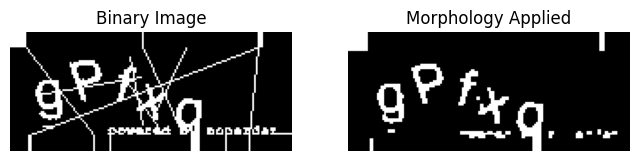

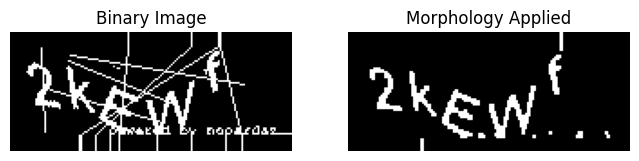

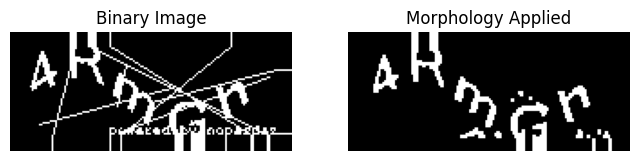

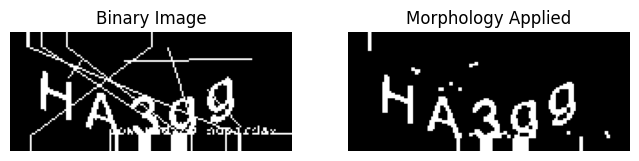

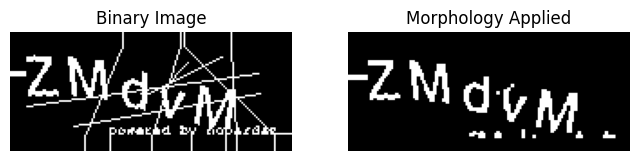

In [ ]:
morphed_images = {}

for image_path, binary_image in binary_images.items():
    kernel = np.ones((2, 2), np.uint8)
    morphed_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=1)
    morphed_image = cv2.morphologyEx(morphed_image, cv2.MORPH_CLOSE, kernel, iterations=1)
    
    morphed_images[image_path] = morphed_image

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap="gray")
    plt.title("Binary Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(morphed_image, cmap="gray")
    plt.title("Morphology Applied")
    plt.axis("off")

    plt.show()


In [7]:
output_folder = "processed_captcha_images"
os.makedirs(output_folder, exist_ok=True)

for image_path, processed_image in morphed_images.items():
    output_path = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(output_path, processed_image)
    print(f"Processed image saved at: {output_path}")


Processed image saved at: processed_captcha_images\captcha1.jpg
Processed image saved at: processed_captcha_images\captcha2.jpg
Processed image saved at: processed_captcha_images\captcha3.jpg
Processed image saved at: processed_captcha_images\captcha4.jpg
Processed image saved at: processed_captcha_images\captcha5.jpg
